# Feature Engineering for Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\furka\JupyterNotebookProjects\Fund_Stats\Fund-Stats\tefas_funds_data.csv")

In [3]:
fund_codes = ["KPC", "HKH", "KLU", "KZL", "CPU", "KUT"]

In [4]:
# Convert to datetime format
df['date'] = pd.to_datetime(df['date'])

In [5]:
fund_codes = ["KPC", "HKH", "KLU", "KZL", "CPU", "KUT"]

In [6]:
df

,date,code,title,price,market_cap,number_of_investors,number_of_shares
0,2019-09-23,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.175174,8.308115e+06,298.0,7.069690e+06
1,2019-09-24,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.193278,8.495458e+06,295.0,7.119429e+06
2,2019-09-25,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.185895,8.384649e+06,288.0,7.070313e+06
3,2019-09-26,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.194965,8.071311e+06,287.0,6.754434e+06
4,2019-09-27,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.181067,7.889600e+06,285.0,6.680062e+06
...,...,...,...,...,...,...,...
4708,2024-09-02,KLU,KUVEYT TÜRK PORTFÖY PARA PİYASASI KATILIM (TL)...,2.282647,4.102847e+10,56230.0,1.797407e+10
4709,2024-09-02,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.045513,2.587774e+09,34374.0,4.280487e+08
4710,2024-09-02,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.486352,7.326663e+08,21153.0,4.929293e+08
4711,2024-09-02,KUT,KUVEYT TÜRK PORTFÖY KIYMETLİ MADENLER KATILIM ...,4.613837,1.118915e+09,13860.0,2.425128e+08


In [7]:
print(df.isnull().sum())

date                   0
code                   0
title                  0
price                  0
market_cap             0
number_of_investors    0
number_of_shares       0
dtype: int64


## Seasonality

In [8]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [9]:
df = df.dropna(subset=['price'])

In [10]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

In [11]:
df

,date,code,title,price,market_cap,number_of_investors,number_of_shares,year,month,day_of_week
0,2019-09-23,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.175174,8.308115e+06,298.0,7.069690e+06,2019,9,0
1,2019-09-24,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.193278,8.495458e+06,295.0,7.119429e+06,2019,9,1
2,2019-09-25,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.185895,8.384649e+06,288.0,7.070313e+06,2019,9,2
3,2019-09-26,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.194965,8.071311e+06,287.0,6.754434e+06,2019,9,3
4,2019-09-27,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.181067,7.889600e+06,285.0,6.680062e+06,2019,9,4
...,...,...,...,...,...,...,...,...,...,...
4708,2024-09-02,KLU,KUVEYT TÜRK PORTFÖY PARA PİYASASI KATILIM (TL)...,2.282647,4.102847e+10,56230.0,1.797407e+10,2024,9,0
4709,2024-09-02,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.045513,2.587774e+09,34374.0,4.280487e+08,2024,9,0
4710,2024-09-02,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.486352,7.326663e+08,21153.0,4.929293e+08,2024,9,0
4711,2024-09-02,KUT,KUVEYT TÜRK PORTFÖY KIYMETLİ MADENLER KATILIM ...,4.613837,1.118915e+09,13860.0,2.425128e+08,2024,9,0


## Lag Features

In [12]:
df_kpc =  df[df['code'] == 'KPC'].copy()
df_hkh =  df[df['code'] == 'HKH'].copy()
df_kzl =  df[df['code'] == 'KZL'].copy()
df_kut =  df[df['code'] == 'KUT'].copy()
df_cpu =  df[df['code'] == 'CPU'].copy()

In [13]:
lag = 1

# Lag
df_kpc[f"y_lag_{lag}"] = df_kpc["price"].shift(periods=lag)
df_hkh[f"y_lag_{lag}"] = df_hkh["price"].shift(periods=lag)
df_kzl[f"y_lag_{lag}"] = df_kzl["price"].shift(periods=lag)
df_kut[f"y_lag_{lag}"] = df_kut["price"].shift(periods=lag)
df_cpu[f"y_lag_{lag}"] = df_cpu["price"].shift(periods=lag)

df_kpc.head()

,date,code,title,price,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,y_lag_1
213,2020-07-29,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,0.999045,40336.43,47.0,40375.0,2020,7,2,NaN
215,2020-07-30,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,1.001424,560627.17,78.0,559830.0,2020,7,3,0.999045
217,2020-08-04,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,1.004887,867104.68,91.0,862888.0,2020,8,1,1.001424
219,2020-08-05,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,0.969291,943796.82,119.0,973698.0,2020,8,2,1.004887
221,2020-08-06,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,0.968656,1259683.35,138.0,1300444.0,2020,8,3,0.969291


In [14]:
df_hkh.tail(20)

,date,code,title,price,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,y_lag_1
4593,2024-08-06,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.161189,2.707720e+09,35985.0,439480067.0,2024,8,1,6.555154
4601,2024-08-07,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.164344,2.800705e+09,35735.0,454339499.0,2024,8,2,6.161189
4610,2024-08-08,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.326975,2.872449e+09,35668.0,454000305.0,2024,8,3,6.164344
4614,2024-08-09,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.378955,2.791295e+09,35643.0,437578662.0,2024,8,4,6.326975
4621,2024-08-12,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.268866,2.737665e+09,35588.0,436708170.0,2024,8,0,6.378955
4627,2024-08-13,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.144431,2.684686e+09,35563.0,436929920.0,2024,8,1,6.268866
4631,2024-08-14,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.159534,2.681452e+09,35408.0,435333639.0,2024,8,2,6.144431
4636,2024-08-15,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.122810,2.679305e+09,35262.0,437594017.0,2024,8,3,6.159534
4645,2024-08-16,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.223723,2.817159e+09,35178.0,452648433.0,2024,8,4,6.122810
4652,2024-08-19,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.115592,2.666982e+09,35114.0,436095541.0,2024,8,0,6.223723


In [15]:
# Weekly Lag
freq = "5d"
    
df_kpc[f"y_lag_{freq}"] = df_kpc["price"].shift(periods=5)
df_hkh[f"y_lag_{freq}"] = df_hkh["price"].shift(periods=5)
df_kzl[f"y_lag_{freq}"] = df_kzl["price"].shift(periods=5)
df_kut[f"y_lag_{freq}"] = df_kut["price"].shift(periods=5)
df_cpu[f"y_lag_{freq}"] = df_cpu["price"].shift(periods=5)

df_cpu.tail(20)

,date,code,title,price,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,y_lag_1,y_lag_5d
4596,2024-08-06,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.356646,7.081721e+08,22125.0,522001966.0,2024,8,1,1.396873,1.453035
4600,2024-08-07,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.379671,6.966944e+08,22080.0,504971469.0,2024,8,2,1.356646,1.447730
4608,2024-08-08,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.402667,7.068454e+08,21874.0,503929469.0,2024,8,3,1.379671,1.455757
4616,2024-08-09,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.393545,7.159657e+08,21771.0,513772986.0,2024,8,4,1.402667,1.464491
4622,2024-08-12,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.399755,7.200084e+08,21714.0,514381611.0,2024,8,0,1.393545,1.396873
4625,2024-08-13,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.410032,7.262988e+08,21682.0,515093855.0,2024,8,1,1.399755,1.356646
4632,2024-08-14,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.427310,7.321348e+08,21655.0,512947450.0,2024,8,2,1.410032,1.379671
4638,2024-08-15,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.430260,7.324642e+08,21520.0,512119689.0,2024,8,3,1.427310,1.402667
4641,2024-08-16,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.471739,7.517642e+08,21439.0,510799970.0,2024,8,4,1.430260,1.393545
4651,2024-08-19,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.477373,7.535907e+08,21386.0,510088391.0,2024,8,0,1.471739,1.399755


## Window Features

In [16]:
# List of DataFrames and their names
dataframes = [df_kpc, df_hkh, df_kzl, df_kut, df_cpu]

# Apply the 3-day rolling window operation for each DataFrame
for i, df in enumerate(dataframes):
    # Rolling window calculations
    result = (
        df["price"]
        .rolling(window=3)  # Window size of 3 days
        .agg(["mean", "std"])  # Calculate mean and standard deviation
        .shift(periods=1)  # Shift data by 1 period to avoid potential data leakage
    )

    # Add prefix to column names
    result = result.add_prefix(f"y_window_3_")

    # Add the new features to the main DataFrame
    dataframes[i] = df.merge(result, how="left", left_index=True, right_index=True)

# Update the original DataFrames
df_kpc, df_hkh, df_kzl, df_kut, df_cpu = dataframes

In [17]:
# List of DataFrames and their names
dataframes = [df_kpc, df_hkh, df_kzl, df_kut, df_cpu]

# Apply the 7-day rolling window operation for each DataFrame
for i, df in enumerate(dataframes):
    # Rolling window calculations
    result = (
        df["price"]
        .rolling(window=5)  # Window size of 5 days
        .agg(["mean", "std"])  # Calculate mean and standard deviation
        .shift(periods=1)  # Shift data by 1 period to avoid potential data leakage
    )

    # Add prefix to column names
    result = result.add_prefix(f"y_window_5_")

    # Add the new features to the main DataFrame
    dataframes[i] = df.merge(result, how="left", left_index=True, right_index=True)

# Update the original DataFrames
df_kpc, df_hkh, df_kzl, df_kut, df_cpu = dataframes

In [18]:
df_kpc

,date,code,title,price,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,y_lag_1,y_lag_5d,y_window_3_mean,y_window_3_std,y_window_5_mean,y_window_5_std
213,2020-07-29,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,0.999045,4.033643e+04,47.0,40375.0,2020,7,2,NaN,NaN,NaN,NaN,NaN,NaN
215,2020-07-30,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,1.001424,5.606272e+05,78.0,559830.0,2020,7,3,0.999045,NaN,NaN,NaN,NaN,NaN
217,2020-08-04,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,1.004887,8.671047e+05,91.0,862888.0,2020,8,1,1.001424,NaN,NaN,NaN,NaN,NaN
219,2020-08-05,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,0.969291,9.437968e+05,119.0,973698.0,2020,8,2,1.004887,NaN,1.001785,0.002938,NaN,NaN
221,2020-08-06,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,0.968656,1.259683e+06,138.0,1300444.0,2020,8,3,0.969291,NaN,0.991867,0.019628,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,2024-08-27,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,11.203509,4.526711e+09,34478.0,404044019.0,2024,8,1,11.378392,11.806162,11.544416,0.145803,11.632801,0.161580
4692,2024-08-27,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,11.203509,4.526711e+09,34478.0,404044019.0,2024,8,1,11.203509,11.724595,11.395045,0.200382,11.512271,0.215657
4695,2024-08-28,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,11.486361,4.622309e+09,34284.0,402417205.0,2024,8,2,11.203509,11.651623,11.261803,0.100969,11.408053,0.213295
4703,2024-08-29,KPC,KUVEYT TÜRK PORTFÖY KATILIM HİSSE SENEDİ (TL) ...,11.523798,4.624796e+09,34147.0,401325648.0,2024,8,3,11.486361,11.603234,11.297793,0.163305,11.375001,0.175586


## Finalize tabularization

In [19]:
df_kpc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 213 to 4707
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1060 non-null   datetime64[ns]
 1   code                 1060 non-null   object        
 2   title                1060 non-null   object        
 3   price                1060 non-null   float64       
 4   market_cap           1060 non-null   float64       
 5   number_of_investors  1060 non-null   float64       
 6   number_of_shares     1060 non-null   float64       
 7   year                 1060 non-null   int32         
 8   month                1060 non-null   int32         
 9   day_of_week          1060 non-null   int32         
 10  y_lag_1              1059 non-null   float64       
 11  y_lag_5d             1055 non-null   float64       
 12  y_window_3_mean      1057 non-null   float64       
 13  y_window_3_std       1057 non-null  

In [20]:
non_numeric_columns = ['code', 'title']
df_kpc = df_kpc.drop(columns=non_numeric_columns)
df_hkh = df_hkh.drop(columns=non_numeric_columns)
df_kzl = df_kzl.drop(columns=non_numeric_columns)
df_kut = df_kut.drop(columns=non_numeric_columns)
df_cpu = df_cpu.drop(columns=non_numeric_columns)

In [21]:
df_kpc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 213 to 4707
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1060 non-null   datetime64[ns]
 1   price                1060 non-null   float64       
 2   market_cap           1060 non-null   float64       
 3   number_of_investors  1060 non-null   float64       
 4   number_of_shares     1060 non-null   float64       
 5   year                 1060 non-null   int32         
 6   month                1060 non-null   int32         
 7   day_of_week          1060 non-null   int32         
 8   y_lag_1              1059 non-null   float64       
 9   y_lag_5d             1055 non-null   float64       
 10  y_window_3_mean      1057 non-null   float64       
 11  y_window_3_std       1057 non-null   float64       
 12  y_window_5_mean      1055 non-null   float64       
 13  y_window_5_std       1055 non-null  

In [22]:
df_kpc.dropna(inplace=True)
df_hkh.dropna(inplace=True)
df_kzl.dropna(inplace=True)
df_kut.dropna(inplace=True)
df_cpu.dropna(inplace=True)

y_kpc = df_kpc["price"]
X_kpc = df_kpc.drop("price", axis=1)
y_hkh = df_hkh["price"]
X_hkh = df_hkh.drop("price", axis=1)
y_kzl = df_kzl["price"]
X_kzl = df_kzl.drop("price", axis=1)
y_kut = df_kut["price"]
X_kut = df_kut.drop("price", axis=1)
y_cpu = df_cpu["price"]
X_cpu = df_cpu.drop("price", axis=1)

In [23]:
# Predictor
X_kpc.head()

,date,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,y_lag_1,y_lag_5d,y_window_3_mean,y_window_3_std,y_window_5_mean,y_window_5_std
223,2020-08-07,1330876.39,153.0,1450916.0,2020,8,4,0.968656,0.999045,0.980945,0.020737,0.988661,0.018093
226,2020-08-10,1975764.94,159.0,2082715.0,2020,8,0,0.917266,1.001424,0.951738,0.029855,0.972305,0.035218
228,2020-08-11,2207248.32,173.0,2291883.0,2020,8,1,0.948649,1.004887,0.944857,0.025904,0.961750,0.032077
230,2020-08-12,2510223.87,189.0,2571474.0,2020,8,2,0.963072,0.969291,0.942996,0.023420,0.953387,0.021835
232,2020-08-13,3506272.61,213.0,3588008.0,2020,8,3,0.976181,0.968656,0.962634,0.013771,0.954765,0.023260


In [24]:
# Predictor
X_cpu.tail()

,date,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,y_lag_1,y_lag_5d,y_window_3_mean,y_window_3_std,y_window_5_mean,y_window_5_std
4684,2024-08-27,7.480195e+08,21186.0,507036082.0,2024,8,1,1.491931,1.481993,1.495439,0.004060,1.492726,0.006651
4690,2024-08-27,7.480195e+08,21186.0,507036082.0,2024,8,1,1.475279,1.495319,1.487237,0.010435,1.491383,0.009449
4697,2024-08-28,7.508107e+08,21181.0,507030212.0,2024,8,2,1.475279,1.499886,1.480830,0.009614,1.487375,0.011409
4702,2024-08-29,7.321022e+08,21153.0,493001789.0,2024,8,3,1.480801,1.494501,1.477120,0.003188,1.483558,0.009145
4710,2024-09-02,7.326663e+08,21153.0,492929253.0,2024,9,0,1.484989,1.491931,1.480356,0.004870,1.481656,0.007049


In [25]:
end_train = '2024-01-01'
end_test = '2024-09-01'

X_train_kpc = X_kpc.loc[X_kpc['date'] < end_train].copy()
X_test_kpc = X_kpc.loc[(X_kpc['date'] >= end_train) & (X_kpc['date'] < end_test)].copy()

y_train_kpc = y_kpc.loc[X_train_kpc.index]
y_test_kpc = y_kpc.loc[X_test_kpc.index]


In [26]:
X_train_kpc.tail()

,date,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,y_lag_1,y_lag_5d,y_window_3_mean,y_window_3_std,y_window_5_mean,y_window_5_std
3657,2023-12-25,1.448130e+09,12876.0,178571316.0,2023,12,0,8.253855,8.312320,8.158370,0.096119,8.185401,0.098587
3665,2023-12-26,1.401669e+09,12911.0,178128107.0,2023,12,1,8.109535,8.139578,8.141673,0.100061,8.144844,0.071241
3670,2023-12-27,1.415001e+09,12865.0,177920654.0,2023,12,2,7.868883,8.159624,8.077424,0.194484,8.090705,0.142980
3679,2023-12-28,1.415843e+09,12859.0,177821124.0,2023,12,3,7.952991,8.061630,7.977136,0.122129,8.049379,0.147859
3682,2023-12-29,1.443409e+09,12889.0,177511330.0,2023,12,4,7.962173,8.253855,7.928016,0.051416,8.029487,0.152418


In [27]:
X_test_kpc.head()

,date,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,y_lag_1,y_lag_5d,y_window_3_mean,y_window_3_std,y_window_5_mean,y_window_5_std
3691,2024-01-02,1.477606e+09,12918.0,177349583.0,2024,1,1,8.131364,8.109535,8.015509,0.100438,8.004989,0.111761
3698,2024-01-03,1.489897e+09,12965.0,177161561.0,2024,1,2,8.331600,7.868883,8.141712,0.184931,8.049402,0.184285
3701,2024-01-04,1.435693e+09,12962.0,176650207.0,2024,1,3,8.409823,7.952991,8.290929,0.143616,8.157590,0.208948
3707,2024-01-05,1.461410e+09,12913.0,177128893.0,2024,1,4,8.127322,7.962173,8.289582,0.145862,8.192456,0.178616
3716,2024-01-08,1.485735e+09,12926.0,177250359.0,2024,1,0,8.250548,8.131364,8.262564,0.141633,8.250131,0.123821


In [28]:
X_train_kpc = X_train_kpc.drop(columns=['date'])
X_test_kpc = X_test_kpc.drop(columns=['date'])

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

## Lasso

In [30]:
lasso = Lasso(random_state=0)

lasso.fit(X_train_kpc, y_train_kpc)

Lasso(random_state=0)

In [31]:
preds = lasso.predict(X_test_kpc)

rmse = mean_squared_error(y_test_kpc, preds, squared=False)

print(f"performance of lasso = {np.round(rmse, 0)}")

performance of lasso = 6.0


C:\Users\furka\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
# convert to series for plotting

preds = pd.Series(preds, index=X_test_kpc.index)

preds

3691     8.543317
3698     8.604412
3701     8.400631
3707     8.482069
3716     8.577581
          ...    
4679    23.789644
4685    23.467506
4692    23.467506
4695    23.801573
4703    23.787179
Length: 170, dtype: float64

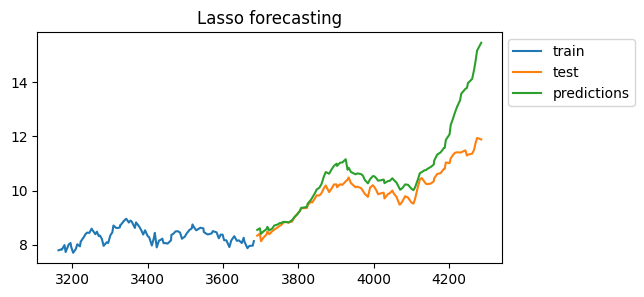

In [33]:
# plot predictions vs actuals

fig, ax = plt.subplots(figsize=(6, 3))
y_train_kpc[-100:].plot(ax=ax, label='train')
y_test_kpc[:100].plot(ax=ax, label='test')
preds.iloc[:100].plot(ax=ax, label='predictions')
plt.title("Lasso forecasting")
ax.legend(bbox_to_anchor=(1.3, 1.0))

Text(0, 0.5, 'Coefficient value')

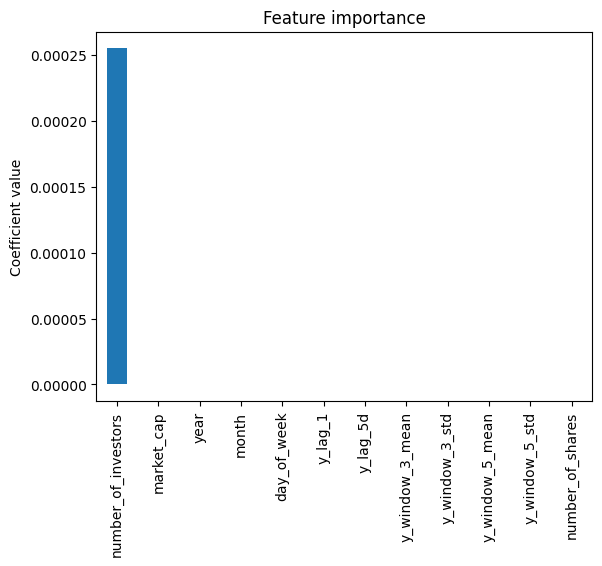

In [34]:
# We can also understand what is driving the predictions of this
# lasso regression.

importance = lasso.coef_
features = lasso.feature_names_in_

pd.Series(importance, index=features).sort_values(ascending=False).plot.bar()
plt.title("Feature importance")
plt.ylabel("Coefficient value")

## Random Forest

In [35]:
rf = RandomForestRegressor(n_estimators=10, random_state=0)

rf.fit(X_train_kpc, y_train_kpc)

RandomForestRegressor(n_estimators=10, random_state=0)

In [36]:
preds = rf.predict(X_test_kpc)

rmse = mean_squared_error(y_test_kpc, preds, squared=False)

print(f"performance of random forests = {np.round(rmse, 0)}")

performance of random forests = 2.0


C:\Users\furka\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
# convert to series for plotting

preds = pd.Series(preds, index=X_test_kpc.index)

preds

3691    8.105700
3698    8.152181
3701    8.331200
3707    8.164521
3716    8.170609
          ...   
4679    8.709883
4685    8.735995
4692    8.735995
4695    8.727545
4703    8.745430
Length: 170, dtype: float64

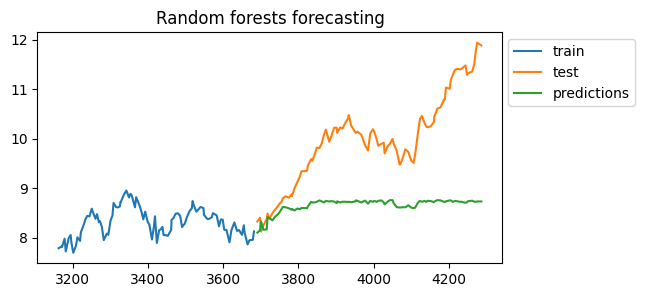

In [38]:
# plot predictions vs actuals

fig, ax = plt.subplots(figsize=(6, 3))
y_train_kpc[-100:].plot(ax=ax, label='train')
y_test_kpc[:100].plot(ax=ax, label='test')
preds.iloc[:100].plot(ax=ax, label='predictions')
plt.title("Random forests forecasting")
ax.legend(bbox_to_anchor=(1.3, 1.0));

Text(0, 0.5, 'Feature importance')

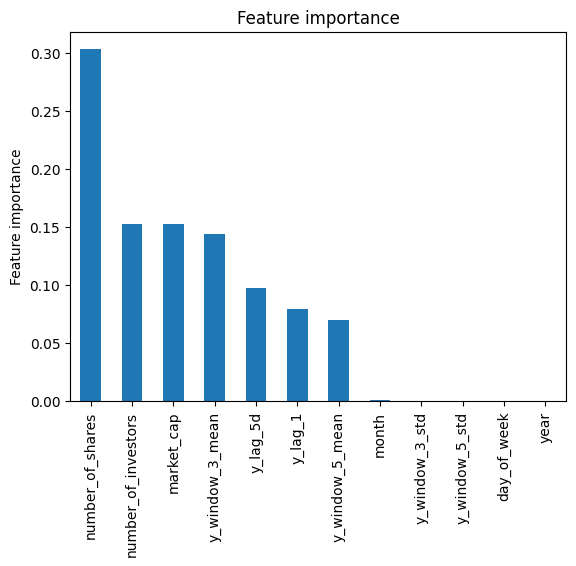

In [39]:
importance = rf.feature_importances_
features = rf.feature_names_in_

pd.Series(importance, index=features).sort_values(ascending=False).plot.bar()
plt.title("Feature importance")
plt.ylabel("Feature importance")